In [1]:
NLS=[[],[],[]]
with open("./NLS_Group16.txt",'r') as nls:
    lines=nls.readlines()
    for n in range(3):
        for i in (lines[500*n+1:(n+1)*500+1]):
            a,b = i.split(" ")[0:2];
            a,b = float(a), float(b)
            NLS[n].append([a,b])

In [2]:
from matplotlib import pyplot as plt

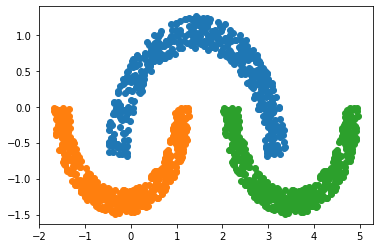

In [3]:
for nls in NLS:
    plt.scatter([i[0] for i in nls],[i[1] for i in nls])

In [4]:
print(len(NLS))
for i in NLS:
    print(len(i))

3
500
500
500


In [5]:
from GMM_MODEL import *

c:\Users\Vaibhav\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
print(NLS[0])

[[0.252976, 0.322817], [0.177614, 0.402176], [1.501707, 0.977546], [2.223671, 1.027652], [2.52614, 0.333931], [0.648536, 0.682983], [1.415116, 1.025749], [1.844002, 0.830896], [2.963463, 0.456604], [1.620555, 1.037601], [-0.293847, 0.189714], [2.819946, 0.543163], [1.660877, 1.138622], [0.425278, 0.733101], [0.197968, 0.682968], [3.167735, -0.330975], [2.359756, 0.83624], [2.313627, 0.722727], [3.103092, -0.032352], [1.672528, 1.23117], [2.531814, 0.486793], [0.905375, 1.066786], [-0.040659, 0.368947], [2.830677, 0.180962], [-0.065546, -0.010812], [1.45248, 1.151042], [-0.247738, -0.137479], [2.138617, 0.782348], [2.818599, 0.590906], [2.027982, 0.924145], [2.897427, 0.411173], [2.123196, 0.881337], [1.589955, 0.9195], [3.035846, -0.214791], [-0.173861, -0.363257], [-0.278334, -0.052847], [0.730783, 0.675265], [3.110505, 0.043586], [1.757019, 0.996355], [1.496242, 0.910408], [1.696175, 0.885296], [1.911142, 0.954074], [2.394893, 0.459252], [-0.152317, -0.458246], [2.256279, 0.658961], 

In [7]:
# splitting the data into train data and test data
# split a list into two with a given ratio
def SplitList(l,ratio):
    middle = round(len(l)*ratio)
    return l[:middle] ,l[middle:]
TrainData = []
TestData = []
for cls in NLS:
    Train, Test = SplitList(cls, 0.7)
    TrainData.append(Train)
    TestData.append(Test)



In [8]:
K=32
model=Bayes_Classifier_GMM(K)

In [9]:
likelihood = model.train(TrainData,20)

center : [[3.097324608695652, -0.2323712173913043], [0.18538300000000002, 0.199516], [-0.34927491666666666, -0.2996146666666667], [1.4226080769230771, 0.9465463076923079], [3.0167667500000004, -0.023405500000000003], [0.1035826, 0.3786520666666666], [2.701210222222222, 0.44774649999999994], [3.0792032000000007, -0.5735282], [-0.29292762499999997, 0.042639500000000004], [2.55168975, 0.5421579999999999], [3.3272626666666665, -0.45570116666666666], [1.662460625, 1.1242589375], [0.8423624285714286, 0.9197607142857143], [-0.029569699999999997, -0.031063599999999997], [0.5529071428571429, 0.9211101428571429], [-0.11510466666666665, 0.27655833333333335], [2.308970083333333, 0.7051489166666668], [1.3519065000000001, 0.8337265], [1.1580277142857143, 1.1074735], [1.7294684285714286, 0.8876550714285714], [0.6480710000000001, 0.7682184285714285], [2.0227082222222226, 0.878917888888889], [-0.24098299999999998, -0.6268220000000001], [1.0760913333333333, 0.8492126666666667], [0.765446, 0.690842000000

In [10]:
print([l[0] for l in likelihood])

[[1, -421.8425347036718], [1, -389.04996493800326], [1, -386.4583503630676]]


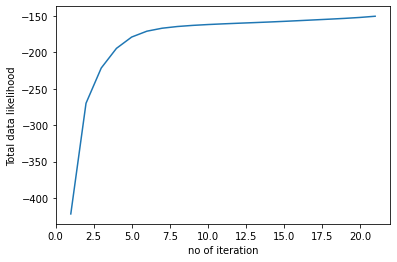

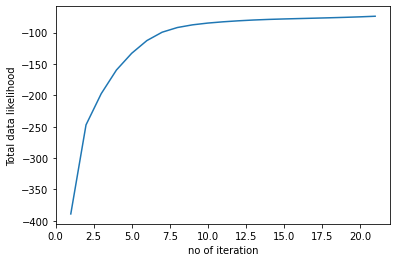

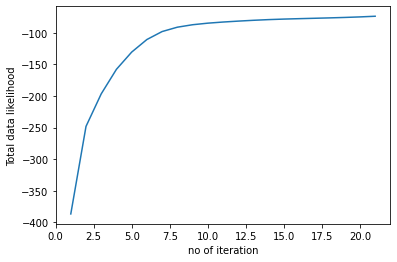

In [11]:
for l in likelihood:
    plt.plot([L[0] for L in l],[L[1] for L in l])
    plt.xlabel("no of iteration")
    plt.ylabel("Total data likelihood")
    plt.show()

In [18]:
print([l[0] for l in likelihood[:-1]])

[[1, -421.8425347036718], [1, -389.04996493800326]]


In [13]:
n=0
for i in model.classes:
        n += 1
        print("Class", n)
        print("Mean:\n", [cl.mean for cl in i.clusters])
        print("Covariance:\n", [cl.covariance for cl in i.clusters])
        print("Prior:\n", i.prior)
        print("")

Class 1
Mean:
 [array([2.94997495, 0.07352462]), array([0.40398833, 0.6508099 ]), array([-0.12649439,  0.1047948 ]), array([1.55590996, 0.87566319]), array([2.83237349, 0.25559417]), array([0.38752788, 0.64679469]), array([2.62302105, 0.57009395]), array([ 3.08216187, -0.16701691]), array([-0.00383336,  0.17370289]), array([2.38667057, 0.63243599]), array([ 3.07017236, -0.43579011]), array([1.64052654, 0.98972035]), array([0.84351338, 0.85041941]), array([0.17945958, 0.29962817]), array([0.73329669, 0.87211786]), array([0.19604544, 0.44289867]), array([2.01071409, 0.84151213]), array([1.50577726, 0.89603216]), array([1.13769649, 0.83757367]), array([1.72167309, 1.02493032]), array([0.70621854, 0.85986649]), array([1.83489809, 0.98135787]), array([-0.25861035, -0.23774018]), array([0.86759562, 0.75547888]), array([0.85660945, 0.89470602]), array([-0.28293384, -0.49942816]), array([-0.12822984,  0.09614363]), array([0.57968367, 0.81273416]), array([2.73767021, 0.41678448]), array([0.4833

In [14]:
confusion = model.test(TestData)
confusion.print()

confusion matrix: 
[[150.   0.   0.]
 [  0. 150.   0.]
 [  0.   0. 150.]]
accuracy:  1.0
precision:  [1.0, 1.0, 1.0]
recall:  [1.0, 1.0, 1.0]
f1_score:  [1.0, 1.0, 1.0]


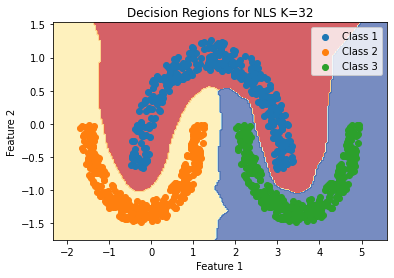

In [15]:
model.plot_decision_regions_2d(f"NLS K={K}",TrainData)

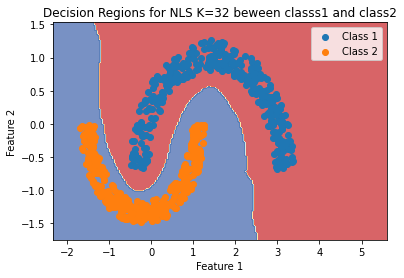

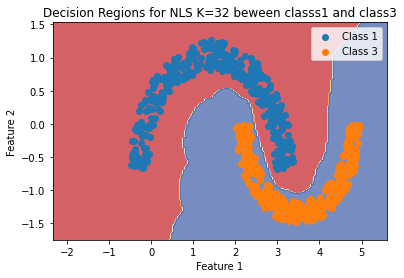

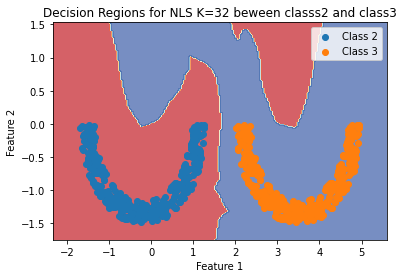

In [16]:
model.plot_decision_regions_for_each_pair_of_classes(f"NLS K={K}",TrainData)

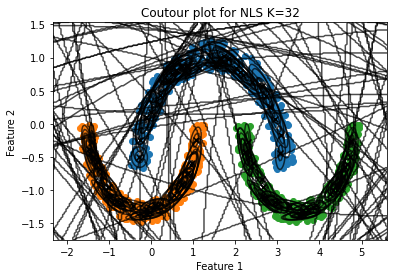

In [17]:
model.plot_contour(f"NLS K={K}",TrainData)